In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
df_segmentation = pd.read_csv("CC GENERAL.csv")
df_segmentation.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

Text(0.5, 1.0, 'Visualization of Data')

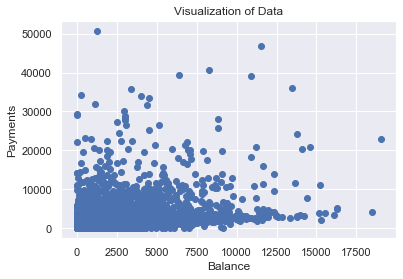

In [13]:
plt.scatter(df_segmentation.iloc[:,1],df_segmentation.iloc[:,14])
plt.xlabel("Balance")
plt.ylabel("Payments")
plt.title("Visualization of Data")

#### Data Standardization

In [16]:
df_segmentation.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [18]:
df_segmentation = df_segmentation[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [19]:
scalar = StandardScaler()

In [29]:
df_segmentation = df_segmentation.dropna()

In [33]:
segmentation_std = scalar.fit_transform(df_segmentation)

### PCA

In [34]:
pca = PCA()

In [35]:
pca.fit(segmentation_std)

PCA()

In [36]:
pca.explained_variance_ratio_

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

Text(0, 0.5, 'Cumulative Explained Variance')

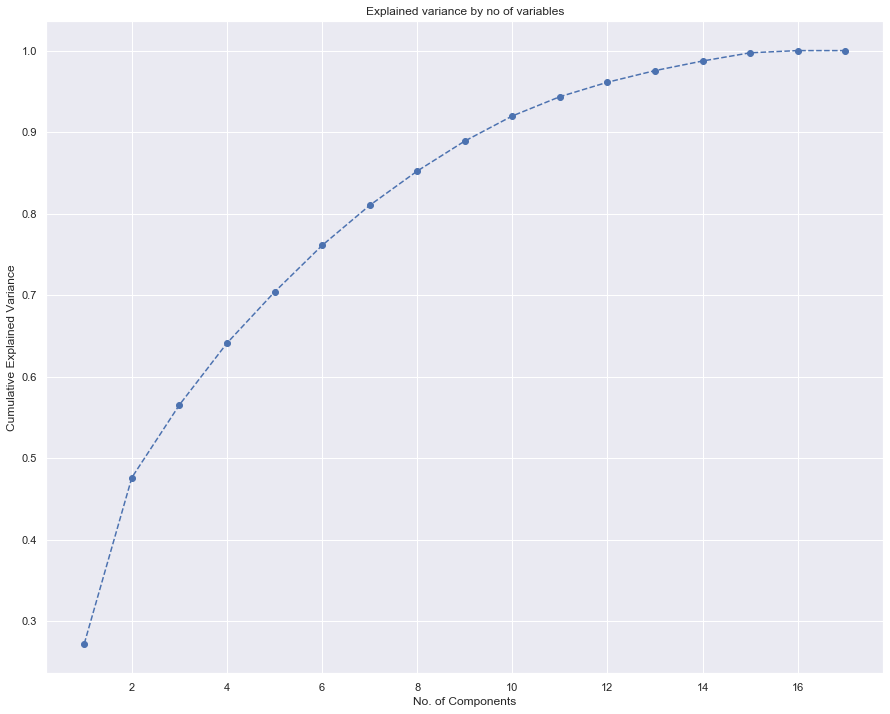

In [41]:
plt.figure(figsize=(15,12))
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Explained variance by no of variables")
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Explained Variance")


In [52]:
pca = PCA(n_components=7)

In [54]:
pca.fit(segmentation_std)

PCA(n_components=7)

In [58]:
print(pd.DataFrame(pca.components_,columns=df_segmentation.columns))

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.091986           0.109812   0.412151          0.346775   
1  0.405979           0.127739   0.049530          0.069930   
2 -0.174155          -0.458853   0.242582          0.368573   
3  0.259423           0.159320   0.064002          0.123148   
4  0.075700          -0.450859  -0.010410         -0.197021   
5  0.035763          -0.014653   0.195992          0.173006   
6 -0.263369           0.098675   0.201357          0.112734   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.337056     -0.030588             0.323665   
1               -0.011481      0.437247            -0.186582   
2               -0.103753     -0.001726            -0.355750   
3               -0.075028     -0.265565            -0.221738   
4                0.337489      0.099425            -0.088538   
5                0.145431     -0.132511            -0.085693   
6                0.268972     -0.038540        

In [59]:
score_pca = pca.transform(segmentation_std)

#### K means clustering with PCA

In [65]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

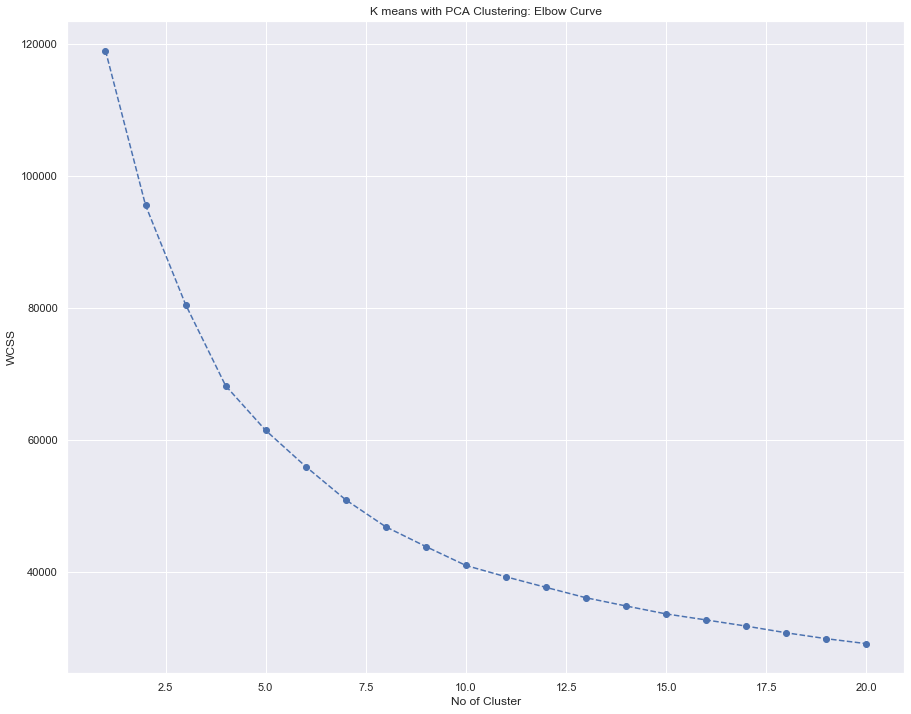

In [69]:
plt.figure(figsize=(15,12))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.title("K means with PCA Clustering: Elbow Curve")
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')

#### Silhotte Score

In [121]:
from sklearn.metrics import silhouette_score
silhote_avg=[]
for i in range(2,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(score_pca)
    cluster_levels = kmeans.labels_
    score = silhouette_score(score_pca,cluster_levels)
    silhote_avg.append(score)


NameError: name 'silhouette_avg' is not defined

<Figure size 1080x864 with 0 Axes>

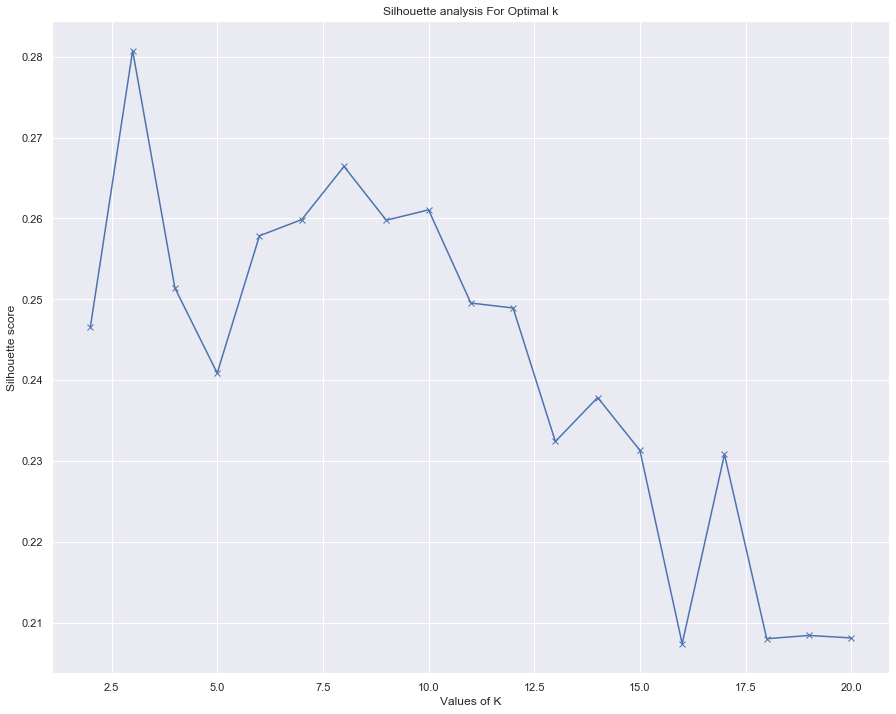

In [122]:
plt.figure(figsize=(15,12))
plt.plot(range(2,21),silhote_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [123]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [124]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=3, random_state=42)

#### Cluster Assignment

In [125]:
df_segm_kmeans_pca = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(score_pca)],axis=1)

In [126]:
df_segm_kmeans_pca.head()
df_segm_kmeans_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0,1,2,3,4,5,6
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,2407.246035,0.000000,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,43.473717,0.000000,6,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,48.886365,0.500000,6,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,82.418369,0.250000,6,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,55.755628,0.250000,6,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810


In [127]:
df_segm_kmeans_pca["Cluster Assignment"] = kmeans_pca.labels_

In [128]:
df_segm_kmeans_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,0,1,2,3,4,5,6,Cluster Assignment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,...,0.000000,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,0.222222,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,0.000000,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,0.000000,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,0.000000,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,1


In [129]:
df_segm_kmeans_pca["Segment"] = df_segm_kmeans_pca["Cluster Assignment"].map({0:'first',1:'second',2:'third',3:'fouth',4:'fifth'})

In [130]:
df_segm_kmeans_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,0,1,2,3,4,5,6,Cluster Assignment,Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,...,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,1,second
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,2,third
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,1,second
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,1,second
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,1,second


In [131]:
df_segm_kmeans_pca = df_segm_kmeans_pca.rename(columns={5: 'comp6', 6: 'comp7',1:'comp2',0:'comp1',2:'comp3',3:'comp4',4:'comp5'})

In [132]:
df_segm_kmeans_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,comp1,comp2,comp3,comp4,comp5,comp6,comp7,Cluster Assignment,Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,...,12,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,1,second
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,12,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,2,third
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,12,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,1,second
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,12,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,1,second
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,12,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,1,second


In [133]:
x_axis = df_segm_kmeans_pca['comp1']
y_axis = df_segm_kmeans_pca['comp2']

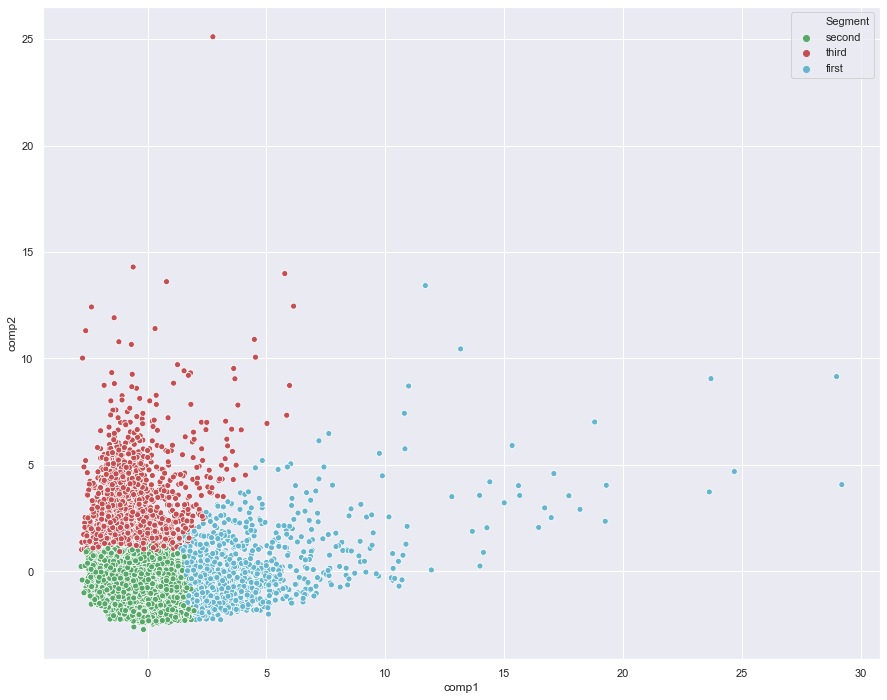

In [135]:
plt.figure(figsize=(15,12))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans_pca["Segment"],palette=['g','r','c'])

In [136]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/